<a href="https://colab.research.google.com/github/SWLee1212/KAIST-ML-Advanced-courses/blob/master/3_3_K_means_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [ ]:
# make_blobs()으로 데이터를 생성해보세요.
X, y = make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.8,random_state=0)

# 데이터의 분포를 변형시키기 위해 transformation을 진행합니다.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X, transformation)

# 데이터 프레임 만들기 
clusterDF = pd.DataFrame(data = X_aniso, columns= ['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)



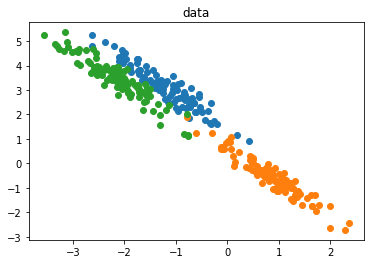

In [ ]:
def data_visualize():
    fig, ax = plt.subplots()
    plt.title('data')
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    
    fig.savefig("plot.png")

data_visualize()

K-means Clustering
target  kmeans_label
0       0               67
        2               31
        1                2
1       1               97
        0                3
2       2               67
        0               33
Name: kmeans_label, dtype: int64


array([2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2,
       2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0], d

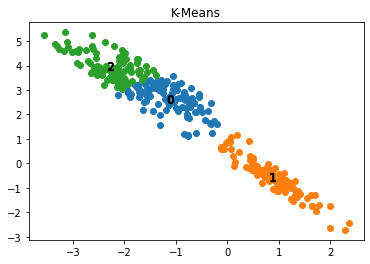

In [7]:
def K_means():
    
    k_means = KMeans(n_clusters=3, init='random', random_state=0)
    
    kmeans_label = k_means.fit(clusterDF.drop(['target'],axis=1)).labels_
    
    clusterDF['kmeans_label']=kmeans_label
    
    # Kmeans 군집의 중심값을 뽑아 저장합니다.
    center = k_means.cluster_centers_
    
    # KMeans 군집 결과를 시각화합니다.
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    plt.title('K-Means')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)
    
    fig.savefig("plot.png")
    # elice_utils.send_image("plot.png")

    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())
    
    return kmeans_label

K_means()    

Gaussian Mixture Model
target  gmm_label
0       0            100
1       1             98
        0              2
2       2             92
        0              8
Name: gmm_label, dtype: int64


array([0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0])

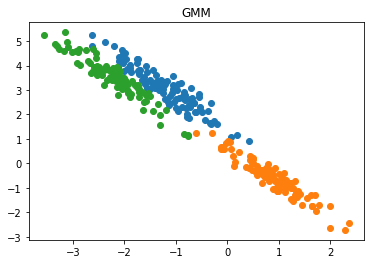

In [25]:
def GMM():
    
    gmm = GaussianMixture(n_components = 3, random_state=0)
    
    # gmm_label =  gmm.fit(clusterDF.drop(['target'],axis=1)).predict(clusterDF.drop(['target'],axis=1))
    gmm_label =  gmm.fit_predict(clusterDF[['ftr1','ftr2']])
    clusterDF['gmm_label']=gmm_label
    
    unique_labels = np.unique(gmm_label)
    
    # GMM 군집 결과를 시각화합니다.
    fig, ax = plt.subplots()
    plt.title('GMM')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
    
    fig.savefig("plot.png")
    # elice_utils.send_image("plot.png")
    
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())
    
    return gmm_label

GMM()

In [24]:
clusterDF[['ftr1','ftr2']]

,ftr1,ftr2
0,-1.975438,4.274322
1,0.982648,-1.117162
2,-0.835232,2.742912
3,-2.227315,3.636009
4,-1.874196,2.832208
...,...,...
295,-1.881669,3.724479
296,-2.011043,3.784595
297,0.945651,-1.020937
298,-1.257936,2.863233


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

from elice_utils import EliceUtils
elice_utils = EliceUtils()

"""
1. 지시 사항과 동일한 타원형 분포의 데이터를
   생성합니다.
   
   Step01. 타원형 분포의 데이터를 생성합니다.
           
           데이터의 개수는 300개,
           데이터 변수의 개수는 2개,
           군집의 개수는 3개,
           데이터의 표준편차는 0.8,
           random_state 는 0으로 설정합니다.
"""
# make_blobs()으로 데이터를 생성해보세요.
X, y = make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.8,random_state=0)

# 데이터의 분포를 변형시키기 위해 transformation을 진행합니다.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X, transformation)

# 데이터 프레임 만들기 
clusterDF = pd.DataFrame(data = X_aniso, columns= ['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)

# 생성된 데이터 시각화
def data_visualize():
    fig, ax = plt.subplots()
    plt.title('data')
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")
    
    
"""
2. K-Means 클러스터링을 수행하여
   클러스터링 결과를 데이터 프레임 내에 
   저장하는 함수를 완성합니다.
   
   Step01. 데이터 X_aniso에 대한 K-Means 
           클러스터링을 수행합니다.
           
           초기화 방식은 랜덤,
           군집의 개수는 3개, 
           random_state는 0으로 설정합니다.
           
    Step02. kmeans_label 변수에
            클러스터링 결과를 저장합니다.
"""
def K_means():
    
    k_means = KMeans(n_clusters=3, init='random', random_state=0)
    
    kmeans_label = k_means.fit(clusterDF.drop(['target'],axis=1)).labels_
    
    clusterDF['kmeans_label']=kmeans_label
    
    # Kmeans 군집의 중심값을 뽑아 저장합니다.
    center = k_means.cluster_centers_
    
    # KMeans 군집 결과를 시각화합니다.
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    plt.title('K-Means')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")

    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())
    
    return kmeans_label
    
"""
3. GMM 클러스터링을 수행하여
   클러스터링 결과를 데이터 프레임 내에 
   저장하는 함수를 완성합니다.
   
   Step01. 데이터 X_aniso에 대한 
           GMM 클러스터링을 수행합니다.
           
           군집의 개수는 3개, 
           random_state는 0으로 설정합니다.
           
   Step02. gmm_label 변수에
           클러스터링 결과를 저장합니다.
            
"""
def GMM():
    
    gmm = GaussianMixture(n_components = 3, random_state=0)
    
    # gmm_label =  gmm.fit(clusterDF.drop(['target'],axis=1)).predict(clusterDF.drop(['target'],axis=1))
    gmm_label = gmm.fit_predict(clusterDF[['ftr1','ftr2']])
    
    clusterDF['gmm_label']=gmm_label
    
    unique_labels = np.unique(gmm_label)
    
    # GMM 군집 결과를 시각화합니다.
    fig, ax = plt.subplots()
    plt.title('GMM')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
    
    fig.savefig("plot.png")
    elice_utils.send_image("plot.png")
    
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())
    
    return gmm_label

def main():
    data_visualize()
    K_means()
    GMM()

if __name__ == "__main__":
    main()
